# Team ZM3 Sentiment analysis project 

### Members
1. Ndamulelo Innocent Nelwamondo
2. Thobekani Masondo
3. Nomvuselelo Simelane
4. John Sekgobela
5. Namhla Sokapase
6. Sandra Malope

## Problem statement

*Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.*

*With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.*

*Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.*

### To start with, lets import important packages for calling the data to the notebook and EDA 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lets now call the data

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test_with_no_labels.csv')

# The rest of the Notebook is then divided into 6 parts, namely, 1. Explanatory data analysis(EDA), 2. Data cleaning, 3. Data prepocessing, 4. Models, 5. Evaluation of models and 6. conclusion

# 1. Explanatory Data Analysis

In [10]:
from powerbiclient import Report, models
from io import StringIO
from ipywidgets import interact
import requests
from PIL import Image

In [24]:
train_df.head() #to see the first five rows in the train twitter dataset

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [25]:
test_df.head() #to see the first five rows in the test twitter dataset

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


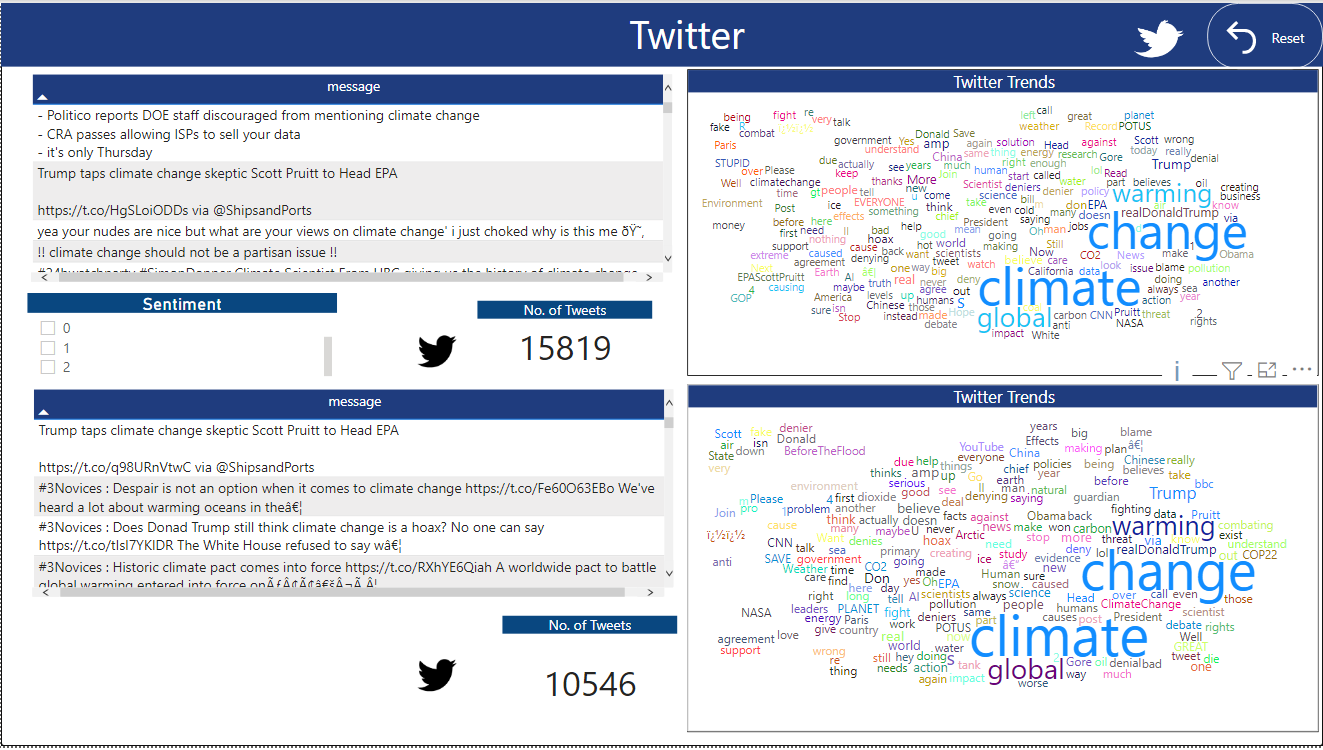

In [28]:
myImage = Image.open("eda.png") #twitter trends photo from powerbi
myImage

In [20]:
# some more stuff here

# 2. Data Cleaning

### Since we working with people thoughts, we do not need web urls, numbers, punctuations and is always good to work with lower cases of text.

In [29]:
import string

In [30]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'

train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

train_df['message'] = train_df['message'].str.lower() #coverting text in train to lowercases
test_df['message'] = test_df['message'].str.lower()  #Converting text in test to lowercases

In [31]:
#Removing punctuation
def remove_punctuations(message):
    for punctuation in string.punctuation:
        message = message.replace(punctuation, '')
    return message

train_df['message'] = train_df['message'].apply(remove_punctuations)
test_df['message'] = test_df['message'].apply(remove_punctuations)

Now lets see what the data looks like after removing web-urls, punctuations and converting messages to text

In [35]:
train_df.head(3) # for train data

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562


In [33]:
test_df.head(3) # for test data

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985


Seems pretty cool to what is wanted

# 3. Data Preprocessing

### Now that our data is about to be ready for analysis, lets get a bit deeper by dividing the texts in to words. And to do that, we must tokenize.

In [37]:
import nltk # for text manipulation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Belutics (pty)
[nltk_data]     Ltd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

A tokeniser divides text into a sequence of tokens.

In [38]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

train_df['message'] = train_df['message'].apply(lemmatize_text)
test_df['message'] = test_df['message'].apply(lemmatize_text)

Now that we've tokenize the data lets now prepare it for analysis, this is by dividing our predictions and messages 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [42]:
X = train_df['message']
y = train_df['sentiment']

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=0.2,shuffle=True, stratify=y, random_state=42)

# 4. Models

In [43]:
# some Important packages for models
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
# insert some more packages wen adding models
from sklearn.metrics import f1_score
import re # for regular expressions
pd.set_option("display.max_colwidth", 200)
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Model 1:

In [44]:
model1 = LinearSVC()
model1.fit(X_train, y_train)
svc_pred = model1.predict(X_val)
f1_score(y_val, svc_pred, average="macro")

0.6540752169904428

## Model 2:

In [49]:
svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
svm_sgd.fit(X_train, y_train)
svm_sgd_pred = svm_sgd.predict(X_val)
f1_score(y_val, svm_sgd_pred, average="macro")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.64446276773113

## Model 3:

## Model 4:

# 5. Best model evaluation

# 5. Conclusion

# Submission to kaggle

In [51]:
testx = test_df['message'] #also transform x_test
test_vect = vectorizer.transform(testx)

y_pred = model1.predict(test_vect) #predict model with transform test data

test_df['sentiment'] = y_pred
test_df.head()

,message,tweetid,sentiment
0,europe will now be looking to china to make sure that it is not alone in fighting climate change… urlweb,169760,1
1,combine this with the polling of staffer re climate change and woman right and you have a fascist state urlweb,35326,1
2,the scary unimpeachable evidence that climate change is already here urlweb itstimetochange climatechange zeroco2,224985,1
3,karoli morgfair osborneink dailykos putin got to you too jill trump doesnt believe in climate change at all think it s hoax,476263,1
4,rt fakewillmoore female orgasm cause global warming sarcastic republican,872928,0


In [52]:
test_df[['tweetid','sentiment']].to_csv('Submission.csv', index=False) # create csv file that is align with competition format